In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('data/Question 1 - AB Testing Data.xlsx')

In [3]:
# ab_data = (df.
#  drop_duplicates(['member_id','job_id']).
#  groupby(['member_id','variant']).
#  agg(y = ('Hired','sum'), 
#      n = ('Hired', len)).
#  reset_index()
# )


ab_data = pd.read_csv('data/ab_data.csv')

ab_data['id'] = np.arange(ab_data.shape[0])

v = np.array([1 if j=='B' else 0 for j in ab_data.variant])
y = ab_data.y.values
n = ab_data.n.values
ids = ab_data.id


In [11]:


with pm.Model() as model:
    
    beta_0 = pm.Normal('beta_0', 0.61, 0.12)
    beta_1 = pm.Normal('beta_1', 0, 1)
    sigma = pm.Bound(pm.StudentT, lower=0)('sigma',nu=3, mu=0, sigma=2.5)
    b = pm.Normal('b',beta_0, sigma, shape=ids.shape)
    
    eta = (b) + beta_1*v
    
    rate_a = pm.Deterministic('A', pm.invlogit(beta_0))
    rate_b = pm.Deterministic('B', pm.invlogit(beta_0 + beta_1))
    
    p = pm.invlogit(eta)
    
    Y = pm.Binomial('Y', p = p, n = n, observed = y)
    
    trace = pm.sample(chains = 4, draws = 4000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [b, sigma, beta_1, beta_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [01:38<00:00, 202.38draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [8]:
with model:
    prior = pm.sample_prior_predictive()
    posterior = pm.sample_posterior_predictive(trace)

100%|██████████| 16000/16000 [00:27<00:00, 578.84it/s]


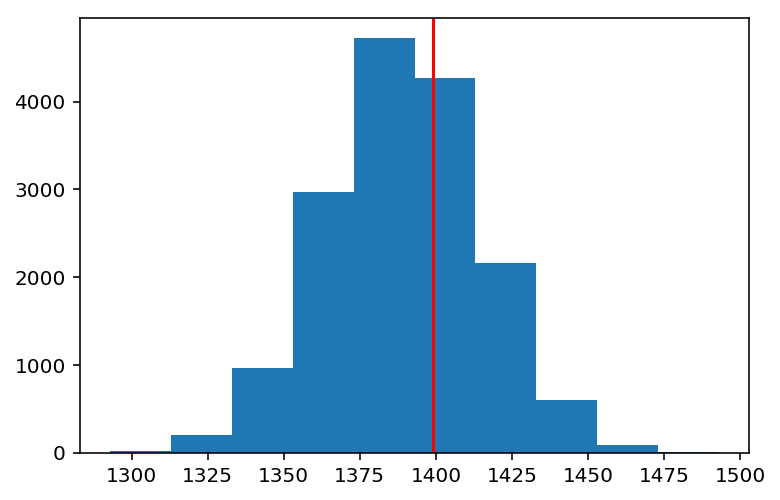

In [9]:
plt.hist(posterior['Y'].sum(1))
plt.axvline(sum(y), color = 'red')

In [7]:
loss = (A-B)
loss[loss<0]=0

loss.mean()

NameError: name 'A' is not defined

In [ ]:
loss = (B-A)
loss[loss<0]=0

loss.mean()

In [ ]:
A.mean()

In [ ]:
B.mean()

In [ ]:
(B-A).mean()